# 線形回帰
線形回帰モデルはフィットが速く、理解しやすいため、一般的である。おそらく直線回帰モデルの最もシンプルな形式には慣れているかもしれないが、そのようなモデルはより複雑なデータの振る舞いの漏れるに拡張することが出来る。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

## シンプルな線形回帰
直線でデータをフィットする線形回帰を考える。直線フィットは次のようなモデルである。

$$y = ax + b$$

ここで、$a$は傾き、$b$は切片として一般的に知られる。

次のような、傾きが2、切片が-5の直線に分布するデータを考える。

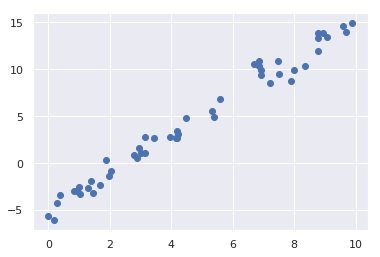

In [2]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y);

このデータをフィットして、最もフィットする線を構成するには、Scikit-Learnの`LinearRegression`を利用することができる。

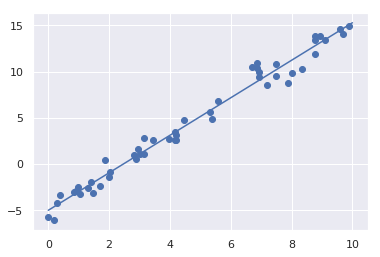

In [3]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

データの傾きと切片はモデルのフィットパラメータに含まれていて、Scikit-Learnではそれらは末尾にアンダースコアが付けられている。ここで関連するパラメータは`coef_`と`intercept_`である。

In [4]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


望んでいた通り、結果は入力に対してとても近いものとなっていることが分かる。

`LinearRegression`はしかしながら、これ以上の力を持っている。シンプルな直線のフィットに加えて、つぎの形であらわされる多次元線形モデルを扱うことが出来る。

$$ y = a_0 + a_1 x_1 + a_2 x_2 + \cdots$$

ここで、複数の$x$の値がある。幾何学的には、これは3次元で平面を点にフィッティングすることや、より高次元で徴兵面を点にフィッティングすることに似ている。

そのような回帰の多次元の振る舞いはそれらをより可視化し難くする。しかし、NumPyのマトリックスの掛け算の操作を利用すれば、あるサンプルデータの構成によりそれらのフィットの一つを見ることが出来る。

In [5]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000127
[ 1.5 -2.   1. ]


ここで、$y$のデータは3つのランダムな$x$の値から計算され、線形回帰はデータを構成するために利用される傾きを明らかにする。

この方法では、一つの`LinearRegression`を直線、平面、超平面でデータのフィットに利用することが出来る。このアプローチは変数間の線形性によって制限されるであろうが、これを緩和することが出来る。

## 基底関数回帰
線形回帰を変数間で非線形な関係のものに適用するのに利用できるひとつのトリックはデータを基底関数に沿って変換することである。このバージョンの一つは`PolynominalRegression`のパイプラインで以前行ったのを見ている。アイデアは多次元線形モデルから取ってこれる。

$$y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3 $$

そして、$x_1, x_2, x_3$などを1次元の入力$x$から構成する。つまり、$x_n = f_n (x)$とし、ここで$f_n ()$はデータを変換する関数である。

例えば、もし$f_n (x) = x^n$ならば、モデルは多項式回帰となる。

$$y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots$$

これはいまだに線形モデルであることに注意すること。線形性は傾き$a_n$が互いに掛けられることも割られることもないという事実を示している。効率的に行っていることは1次元の$x$の値を取ってきて、より高い次元に射影することで、線形フィットは$x$と$y$の間のより複雑な関係をフィットすることが出来る。

## 多項式基底関数
この多項式の射影はScikit-Learnで組み込みで入っていて、`PolynomialFeatures`変換を利用すればとても便利である。

In [6]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

ここでは変換器が1次元の配列をそれぞれの値のべき乗を取ることによって3次元の配列に変換している。この新しい、より次元数の多いデータ表現は線形回帰に接続することが出来る。

以前見たように、これを完遂するのに最もきれいな方法はパイプラインを使用することである。7次元の多項式モデルをこの方法でやってみよう。

In [7]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

この変換を実行すれば、線形モデルを$x$と$y$の間でのより複雑な関係のフィットに使用することが出来る。例えば、ここではノイズを含むサイン波を考える。

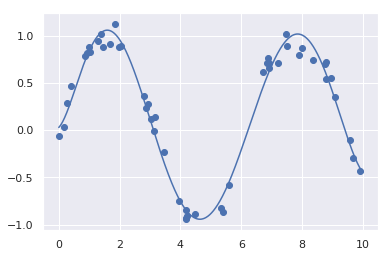

In [8]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

7次の多項式の基底関数を用いた線形モデルでこの非線形のデータをうまくフィットできている。

## ガウス基底関数
もちろん、他の基底関数も可能である。例えば、一つの有用なパターンは多項式基底の和でなく、ガウス基底の和のモデルでフィットすることである。

これらのガウス基底関数はScikit-Learnに組み込みではないが、それらを作成するカスタム変換器を書くことが出来る。（Scikit-Learnの変換器はPythonクラスとして実装される）

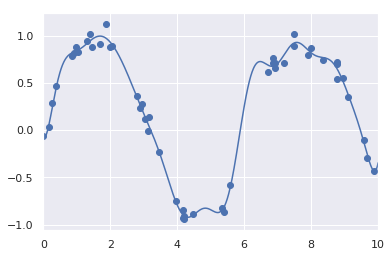

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## 正則化
線形回帰に基底関数を導入することはモデルをより柔軟にするが、すぐにオーバーフィッティングを導く。例えば、多すぎるガウス基底関数を選択したならば、あまりよくなさそうな結果に終わるだろう。

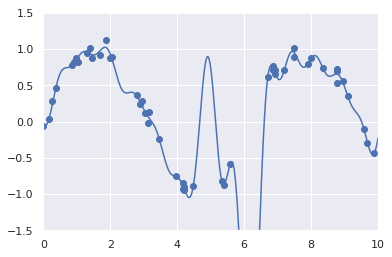

In [10]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

30次元の規定にデータを射影したことで、モデルはあまりに柔軟になりすぎ、データによって制限される場所の間で極端な値になっている。この理由はそれらの場所と関連付けてガウス基底の傾きをプロットするとみることが出来る。

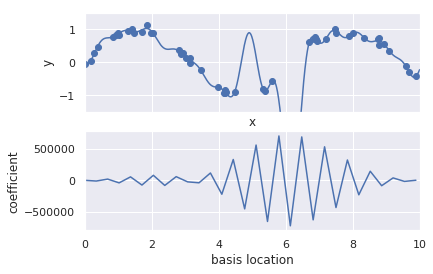

In [11]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

この図の下のパネルはそれぞれの場所での基底関数の大きさを示す。これは基底関数がオーバーラップしたときの典型的なオーバーフィットの振る舞いである。隣接した基底関数の傾きが膨れ上がり、そして互いに打ち消しあう。それらの振る舞いは問題であることが分かっており、もしモデルのパラメータの大きすぎる値にペナルティを与えることで、明示的にモデルのそのようなスパイクを制限できるとよさそうである。そのようなぺねるてぃは正則化として知られ、いくつかの形式がある。

### リッジ回帰（$L_2$正則化）
最も一般的な正則化の形はリッジ回帰、もしくは$L_2$正則化として知られる。これはモデルの傾きの2乗の和のペナルティを課す。このケースではモデルのフィットに対するペナルティは次の通りとなる。

$$P = \alpha \sum^{N}_{n=1} \theta_n^2$$

ここで$\alpha$はペナルティの強さを制御する自由なパラメータである。このタイプのペナルティ付きのモデルは`Ridge`でScikit-Learnに組み込まれている。

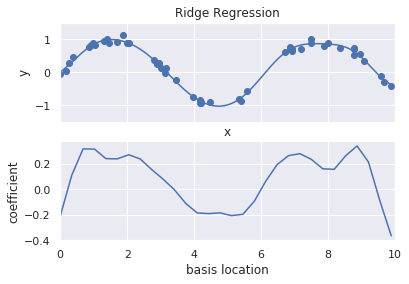

In [12]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

$\alpha$パラメータは結果として得られるモデルの複雑さを制御する重要なノブである。$\alpha \to 0$の制限では、標準的な線形回帰の結果を再現する。$\alpha \to \infty$の制限では全てのモデルの表現が抑制される。特筆すべきリッジ回帰の一つの利点はとても効率的に計算できることである。もとの線形回帰と比べても計算量はほとんど変わりません。

### Lasso回帰（$L_1$正則化）
もう一つの一般的な正則化はlassoとして知られ、それは回帰の傾きの絶対値の和をペナルティとして含む。

$$P = \alpha \sum^N_{n=1} |\theta_n|$$

これはリッジ回帰ととてもよく似たコンセプトであるが、その結果は驚くほど異なる。例えば、幾何学的な理由からlasso回帰は可能な限りモデルが疎になることが多い。つまり、モデルの傾きを優先的にゼロにする。

この振る舞いはリッジ回帰の図を複製して、L1でノーマライズした傾きを利用すると分かる。

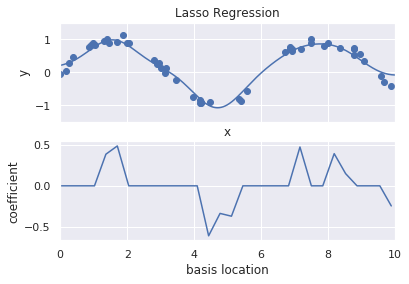

In [13]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.01))
basis_plot(model, title='Lasso Regression')

lasso回帰のペナルティによってたいていの係数がほぼ0となり、その挙動は利用可能な基底関数の小さなサブセットによってモデル化される。リッジ正則化と同様に$\alpha$はペナルティの強さを調整し、それは例えばクロスバリデーションといったもので決定されるべきである。

## 例：自転車の交通量の予測
例として、天気、季節、その他の要素を基にシアトルのFremont橋を渡る自転車の数を予測できるかどうかを見てみる。

このセクションでは、自転車のデータを他のデータセットと結合させ、天気や季節の要素、例えば温度や降水量、日照時間が自転車の交通量に与える程度の決定を試みる。幸運にもNOAAは彼らの日毎のデータを利用可能とそており、2つのデータソースを簡単にPandasで結合させることが出来る。シンプルな線形回帰を天気とその他の情報と自転車の数に対して実行し、これらのパラメータのひとつをどれだけ変えると日々の自転車の数にどれだけ影響を与えるのかを見積もる。

2つのデータセットを読み込み、日毎にインデックスする。

In [14]:
import pandas as pd
counts = pd.read_csv('../data/FremontBridge.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('../data/BicycleWeather.csv', index_col='DATE', parse_dates=True)

In [15]:
counts.head()

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2012-10-03 00:00:00,9.0,4.0
2012-10-03 01:00:00,6.0,4.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,3.0,2.0
2012-10-03 04:00:00,1.0,6.0


In [16]:
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns

In [17]:
daily.head()

,Total
Date,
2012-10-03,3521.0
2012-10-04,3475.0
2012-10-05,3148.0
2012-10-06,2006.0
2012-10-07,2142.0


データに曜日を加える。

In [18]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [19]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun
Date,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


同様に、祝日も異なる振る舞いをすることが予想される。同様にこれを示すものを追加する。

In [20]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

In [21]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday
Date,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


日照時間がどれだけの人が自転車に乗って通るかに影響を与えるであろうことが疑われる。この情報を追加するために、標準的な天文学的な計算を使用する。

(8, 17)

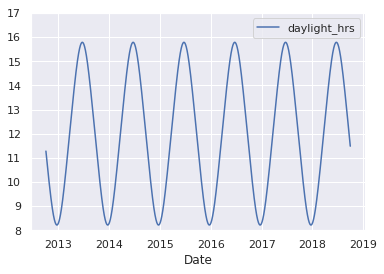

In [22]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
         * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8, 17)

平均温度と、降水量もまたデータに加える。加えて、天気が良いかどうか（降水量0）のフラグを加える。

In [23]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)

daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

最後に、測定からどれだけ立っているかを示すカウンターを追加する。これは年間でどれだけの増減があるかが分かる。

In [24]:
daily['annual'] = (daily.index - daily.index[0]).days / 365.

In [25]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1.0,0.000000
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1.0,0.002740
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1.0,0.005479
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1.0,0.008219
2012-10-07,2142.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.045208,0.0,15.85,1.0,0.010959


これらを実行したら、どの列を使うか選択でき、データに対して線形回帰モデルをフィット出来る。`fit_intercept = False`とするが、これは、dailyフラグがそれらの日毎の切片をとして動作するからである。

In [26]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
                'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

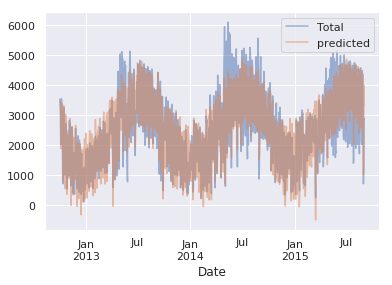

In [27]:
daily[['Total', 'predicted']].plot(alpha=0.5);

いくつかの重要な特徴を利用していないことは明らかで、特にサマータイムなどである。利用した特徴は完ぺきではない（つまり、人々はこれら以上の物に基づいて自転車に乗るかどうかを決定する）、あるいは我々が考慮しなかったいくつかの非線形の関係がある（例えば、高温と低温）。それにもかかわらず、大雑把な予測はいくつかの理解を深めるのに十分であり、それぞれの特徴が日々の自転車の数にどれだけ影響を与えるかを見積もるのに線形モデルの係数を見ることが出来る。

In [28]:
params = pd.Series(model.coef_, index=X.columns)
params

Mon              504.882756
Tue              610.233936
Wed              592.673642
Thu              482.358115
Fri              177.980345
Sat            -1103.301710
Sun            -1133.567246
holiday        -1187.401381
daylight_hrs     128.851511
PRCP            -664.834882
dry day          547.698592
Temp (C)          65.162791
annual            26.942713
dtype: float64

これらの数字はそれらの不確定性の測定なしでは理解するのが難しい。それらの不確定性はデータのブートストラップ法のリサンプリングを利用してすぐに計算できる。

ブートストラップ法は手持ちのサンプルを重複を許してリサンプリングして新たな標本を作ることで、サンプルのばらつきなどについて調べることができる。

In [29]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_
              for i in range(1000)], 0)

In [30]:
print(pd.DataFrame({'effect': params.round(0),
                    'error': err.round(0)}))

              effect  error
Mon            505.0   86.0
Tue            610.0   83.0
Wed            593.0   83.0
Thu            482.0   85.0
Fri            178.0   81.0
Sat          -1103.0   80.0
Sun          -1134.0   83.0
holiday      -1187.0  163.0
daylight_hrs   129.0    9.0
PRCP          -665.0   62.0
dry day        548.0   33.0
Temp (C)        65.0    4.0
annual          27.0   18.0


はじめに、1週間の中で比較的安定した傾向があることが分かる。週末よりも平日の方が多くのライダーがいる。また、日照時間が1時間増えると129±9人の人が増えることもわかる。温度が1度あがると65±4人の人が増える。快晴の日には548±33人の人が増え、降水量が1インチ増えると665±62人の人が自転車に乗らなくなる。これらの効果をすべて考慮して、毎年27±18人の新人ライダーが少しずつ増加している。

このモデルはほぼ確実に関連する情報が欠けている。例えば、非線形の効果（降水量と寒さのような効果）や変数毎の非線形な傾向（とても寒い日、暑い日に自転車に乗るのを控えるような）はこのモデルでは考慮されていない。加えて、よりきめ細かい情報のいくつかは取り扱っていない。（雨が降る朝と雨が降る昼の違いのような）そして、日の間の相関は無視している（雨が降った火曜日が水曜日の数に与えるであろう効果や、連続した雨の日の後の予期せぬ晴れの日の影響）。これらはすべて潜在的に興味深い効果であり、あなたが望むなら、それらを調べるツールを持っている。